In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('futures_prices.csv', index_col = [0], parse_dates=['Date'])
df2 = pd.read_csv('futures_volumes.csv', index_col = [0], parse_dates=['Date'])

# print(df1)
# print(df2)

In [34]:
import numpy as np

df2['Sum'] = df2[['Foreign', 'Dealer', 'Domestic']].sum(axis = 1)
df2['Ratio'] = df2['Sum'] / df2['Total'] * -1

X = 0.2
Y = 0.05

In [35]:
def strategy(C, X = 0.2, Y = 0.05):
    if C > X:
        return -1
    elif C < Y:
        return 1
    else:
        return 0

In [36]:
df2['Signal'] = df2.Ratio.apply(strategy)
signals = df2['Signal'].values

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


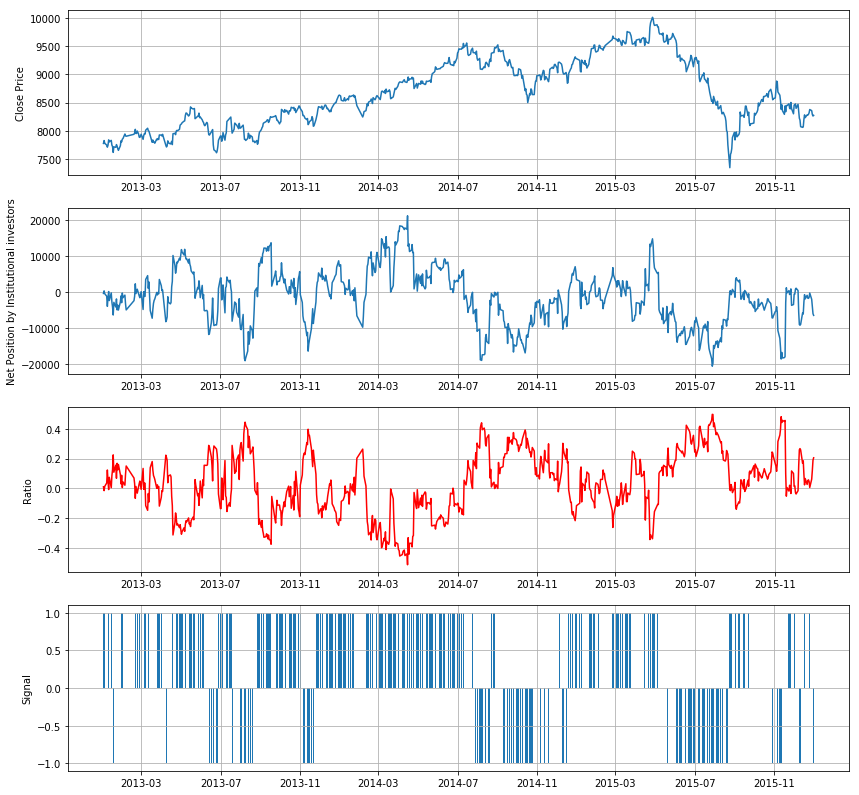

In [37]:
fig = plt.figure(figsize = (14, 14))

ax0 = fig.add_subplot(411)
ax0.plot(df1['Close'])
ax0.grid(True)
ax0.set_ylabel('Close Price')

ax1 = fig.add_subplot(412)
ax1.plot(df2['Sum'])
ax1.grid(True)
ax1.set_ylabel('Net Position by Institutional investors')

ax2 = fig.add_subplot(413)
ax2.plot(df2['Ratio'], color = 'r')
ax2.grid(True)
ax2.set_ylabel('Ratio')

ax3 = fig.add_subplot(414)
plt.bar(df2.index, df2['Signal'])
ax3.grid(True)
ax3.set_ylabel('Signal')

fig.show()

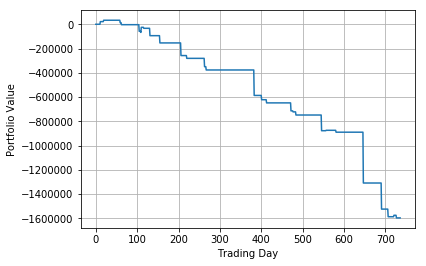

In [48]:
hold = False
long_short_state = 0
init_position = 0
prices = df1['Open'].values
profits = np.zeros((len(prices) - 1, 1))

for i, sig in enumerate(signals[1:-1]):
    if not hold and sig != 0: # open
        init_position = prices[i + 1]
        hold = True
        long_short_state = sig
        
    elif hold and long_short_state == 0: 
        
        profits[i + 1] = profits[i] + sig * (prices[i + 1] - init_position) # close
        
        hold = False
        long_short_state = 0
    elif hold and long_short_state * sig < 0:
        
        profits[i + 1] = profits[i] + sig * (prices[i + 1] - init_position) # close

        long_short_state = long_short_state * -1
        init_position = prices[i + 1]
    else:
        profits[i + 1] = profits[i]

plt.figure()
plt.plot(profits * 200)
plt.xlabel('Trading Day')
plt.ylabel('Portfolio Value')
plt.grid(True)

In [40]:
print(df2['Ratio'][0:20])
print(df2['Signal'][0:20])

Date
2013-01-02    0.009842
2013-01-03   -0.015899
2013-01-04    0.013126
2013-01-07    0.035363
2013-01-08    0.122904
2013-01-09    0.049108
2013-01-10   -0.008646
2013-01-11    0.073767
2013-01-14    0.003946
2013-01-15    0.085263
2013-01-16    0.125213
2013-01-17    0.224401
2013-01-18    0.107739
2013-01-21    0.155417
2013-01-22    0.067308
2013-01-23    0.167885
2013-01-24    0.124401
2013-01-25    0.159656
2013-01-28    0.092693
2013-01-29    0.029528
Name: Ratio, dtype: float64
Date
2013-01-02    1
2013-01-03    1
2013-01-04    1
2013-01-07    1
2013-01-08    0
2013-01-09    1
2013-01-10    1
2013-01-11    0
2013-01-14    1
2013-01-15    0
2013-01-16    0
2013-01-17   -1
2013-01-18    0
2013-01-21    0
2013-01-22    0
2013-01-23    0
2013-01-24    0
2013-01-25    0
2013-01-28    0
2013-01-29    1
Name: Signal, dtype: int64
